### 인공신경망 실습 - Epoch 100 마다 산점도 시각화

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# 인공 신경망 모델 클래스 정의
class SimpleNet(nn.Module) :
    """
    이진 분류 문제
    입력층 2개, 은닉층 1개 (노드 5) 출력층 1개 (시그모이드 활성화 함수 사용)
    """
    def __init__(self) :
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2,5)
        self.fc2 = nn.Linear(5,1)
        pass
    
    def forward(self, x) :
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

#### 데이터 생성

In [3]:
x = torch.randn(100,2)
y = ((x[:,0] > 0) & (x[:, 1] > 0)).float()
print(x)
print(y)

tensor([[-1.2383e+00, -1.4047e+00],
        [ 1.4266e+00, -2.8239e-01],
        [ 7.6372e-01, -1.0586e+00],
        [-2.2318e+00, -1.2976e-01],
        [ 3.8819e-01,  4.3102e-01],
        [-8.2168e-02,  8.1471e-01],
        [-7.0651e-01,  7.2063e-02],
        [ 1.2851e+00, -5.8508e-01],
        [-2.9757e-01, -5.2759e-01],
        [ 1.0176e-01,  6.7394e-01],
        [-1.6040e+00, -2.1962e+00],
        [ 4.0743e-01, -1.2047e+00],
        [-1.2084e+00,  2.1075e-01],
        [ 8.4963e-01,  4.9389e-01],
        [ 5.7317e-01, -1.8744e-01],
        [-2.7635e-01, -8.3334e-01],
        [ 6.2459e-01, -1.0584e+00],
        [-6.2913e-01,  1.0161e-01],
        [-1.3453e-01, -5.1633e-01],
        [-2.1819e-01, -4.4753e-01],
        [ 3.8233e-01, -1.3665e-01],
        [-1.5864e+00, -1.7735e-01],
        [ 2.0917e+00, -7.1615e-01],
        [-8.6732e-01, -1.8943e+00],
        [ 1.3437e+00,  1.3967e+00],
        [-1.1315e+00, -5.2427e-02],
        [ 1.4674e-01,  1.6253e+00],
        [ 5.2716e-01, -1.606

#### 모델 선언

In [4]:
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


#### loss 함수와 옵티마이저 정의

In [5]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#### 학습

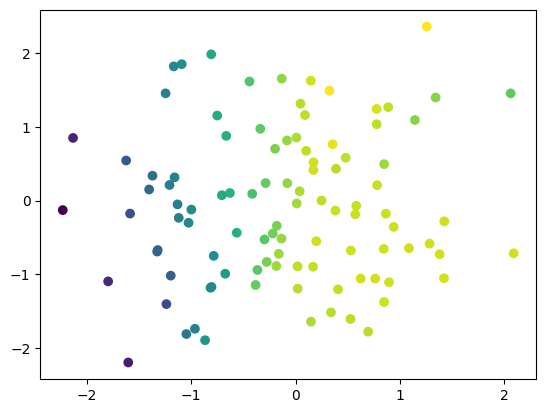

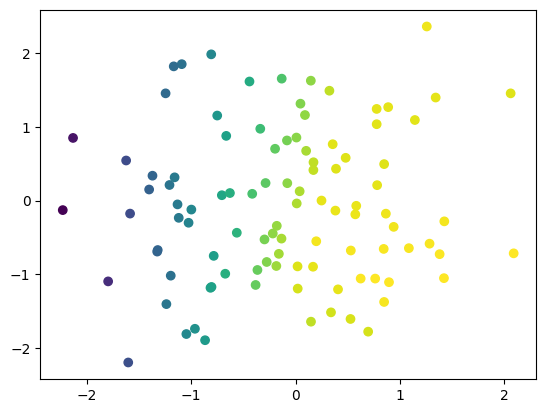

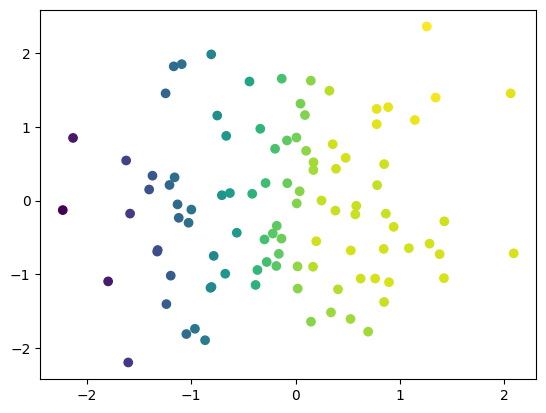

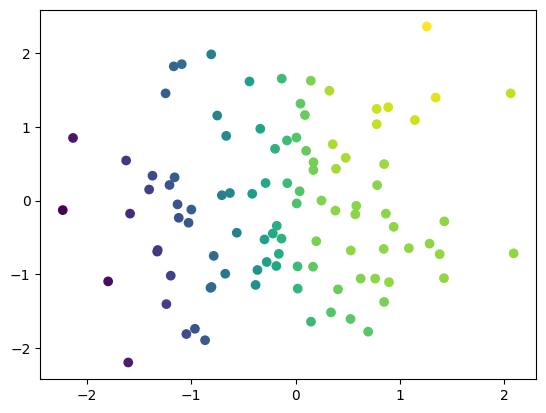

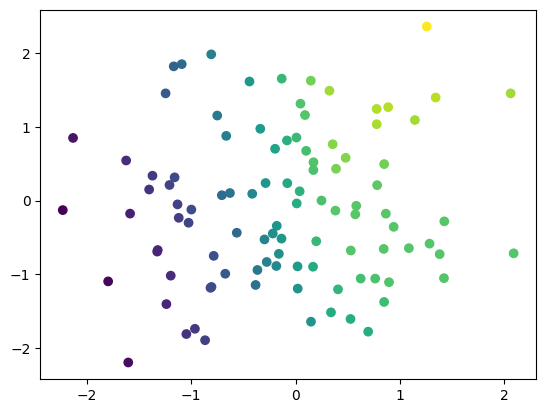

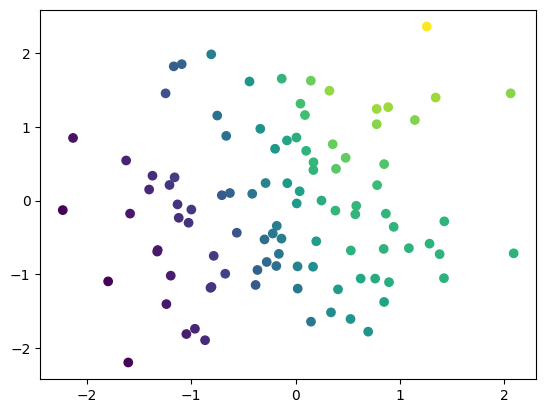

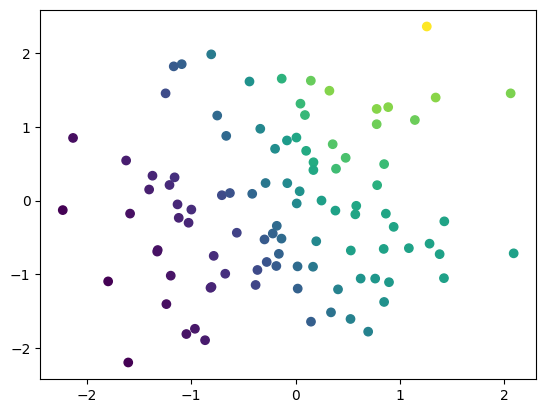

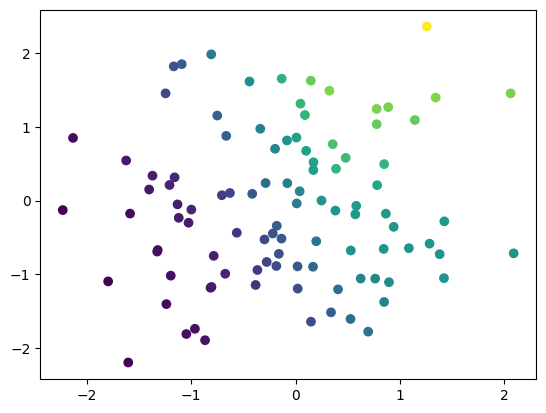

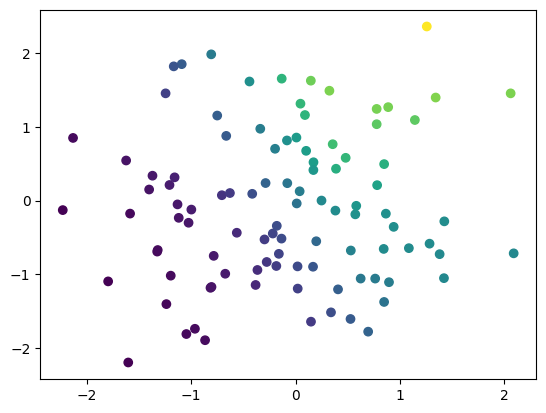

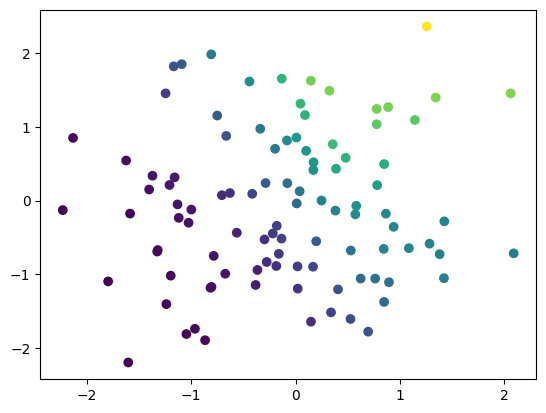

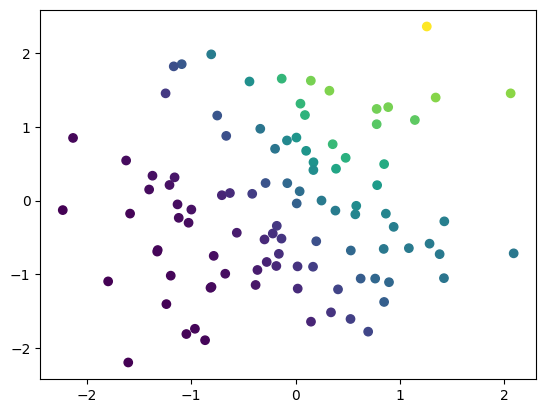

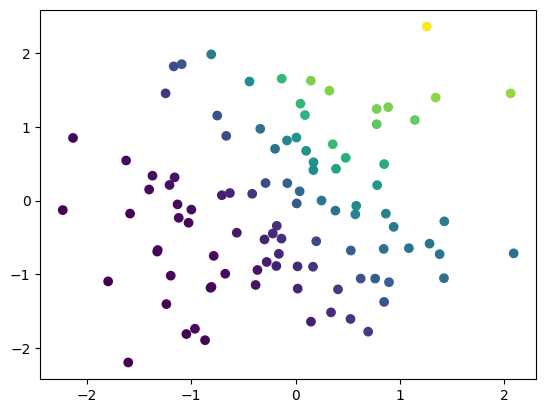

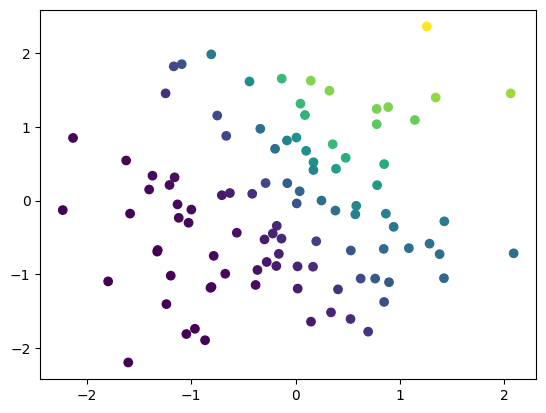

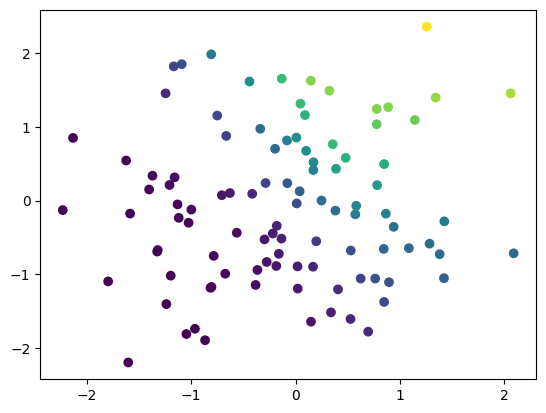

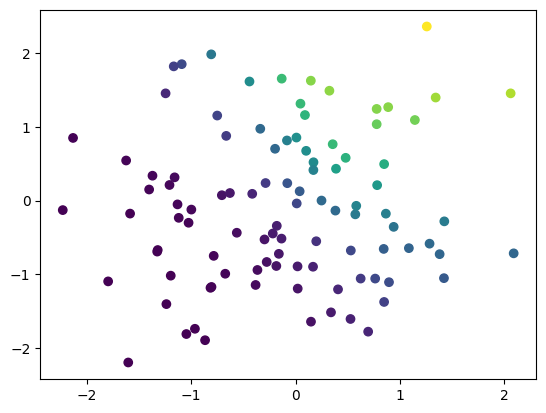

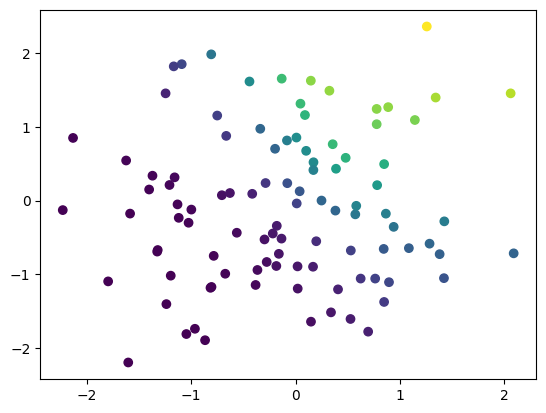

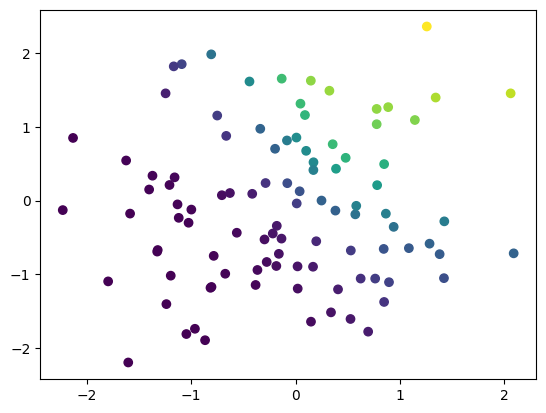

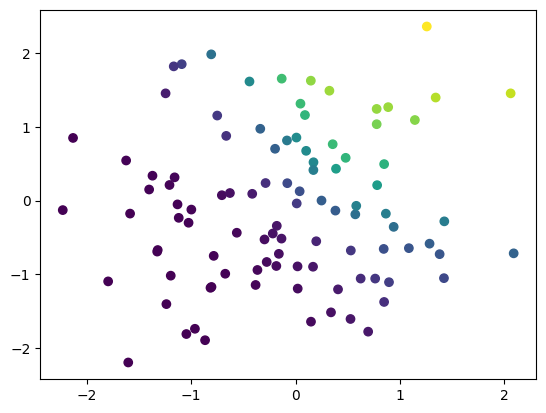

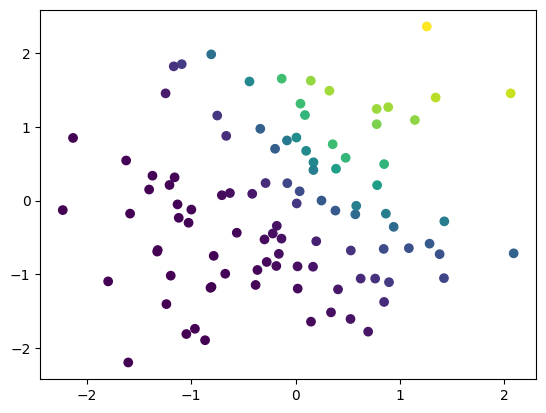

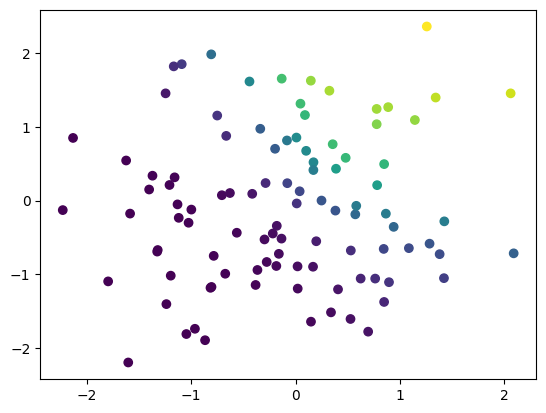

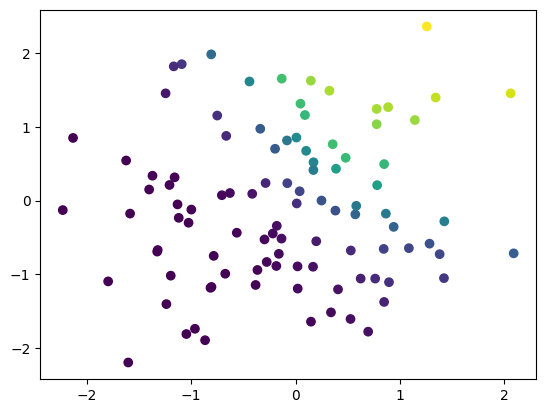

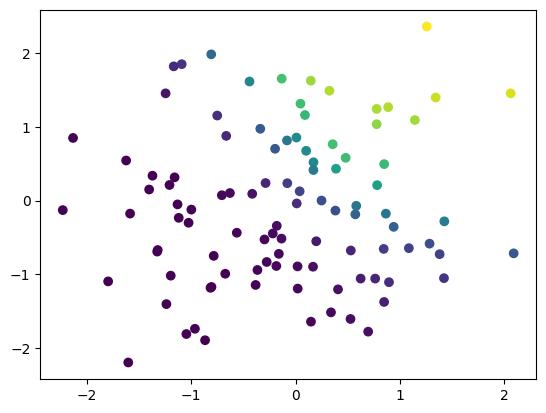

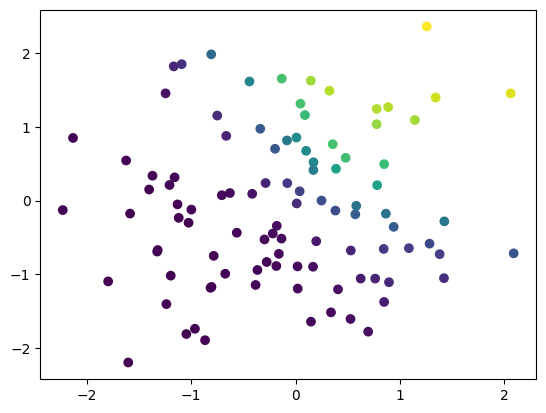

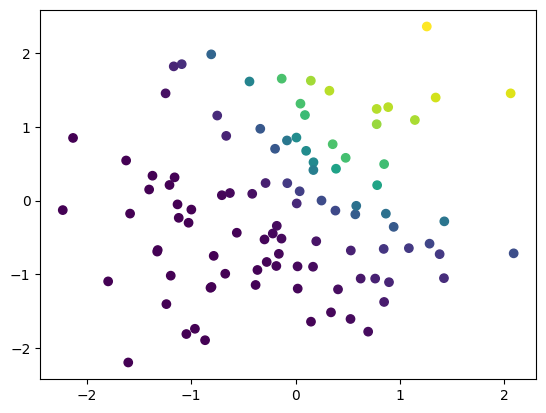

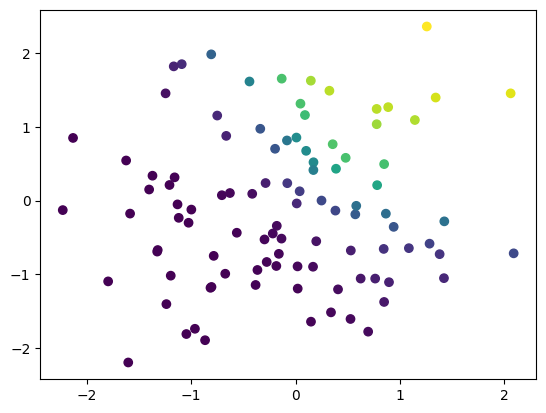

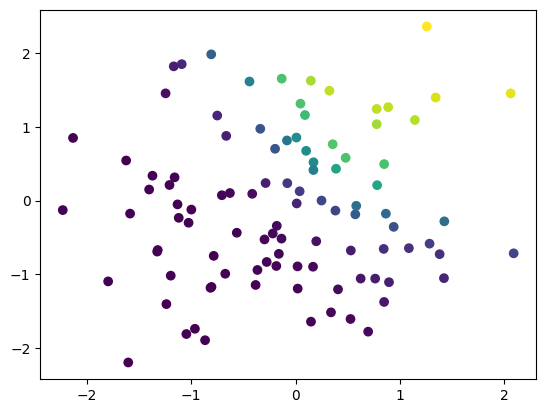

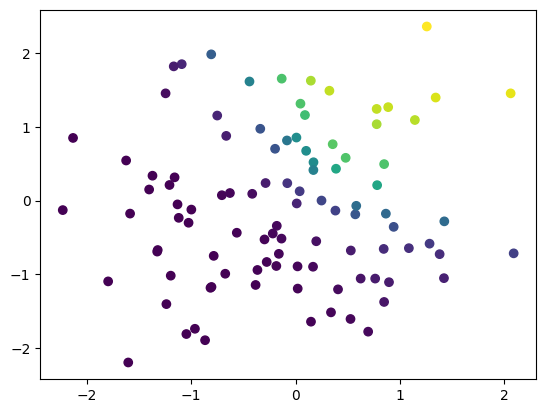

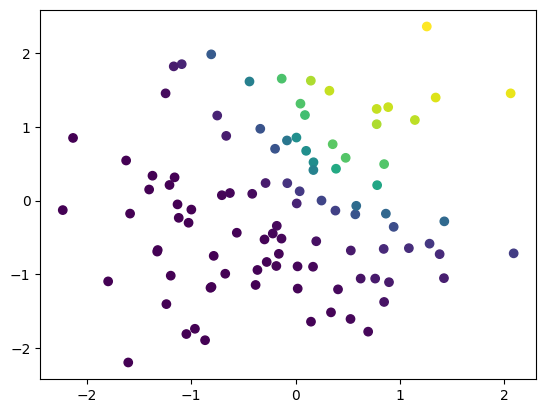

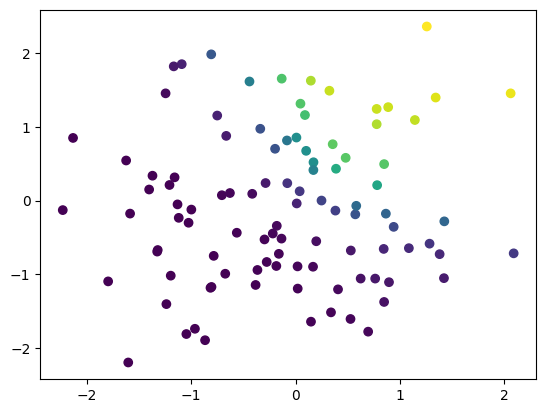

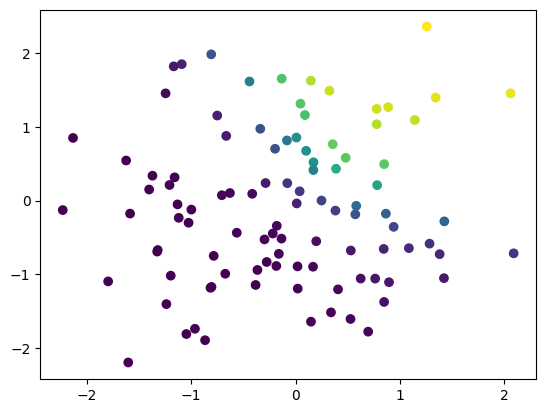

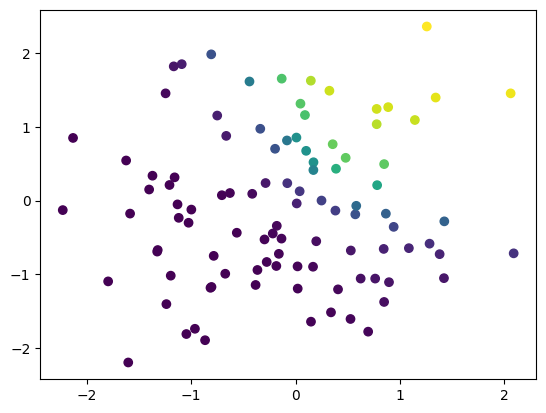

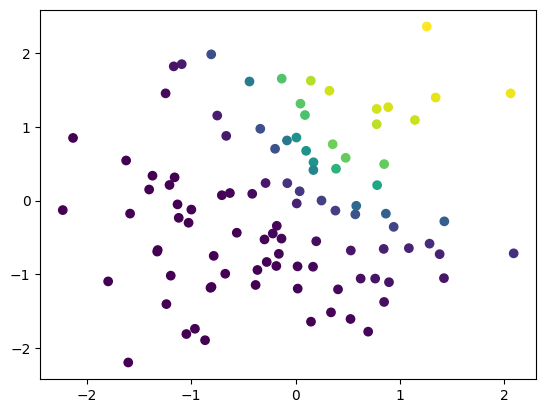

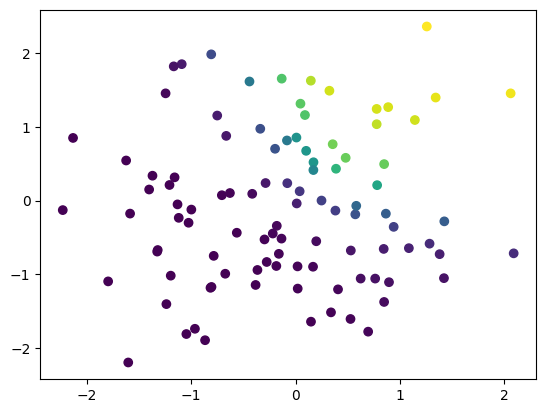

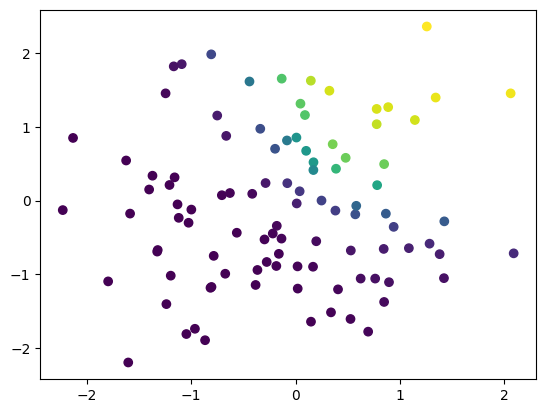

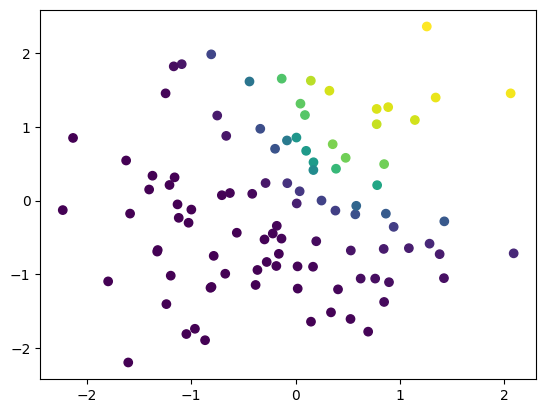

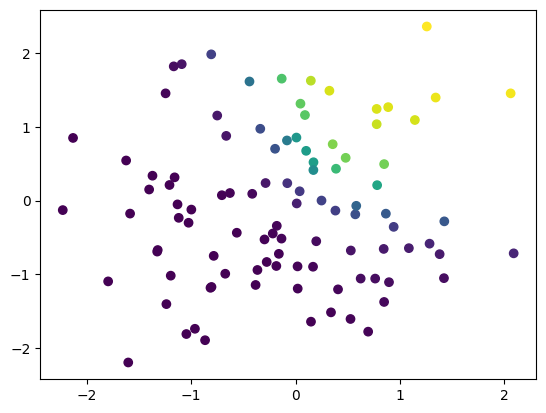

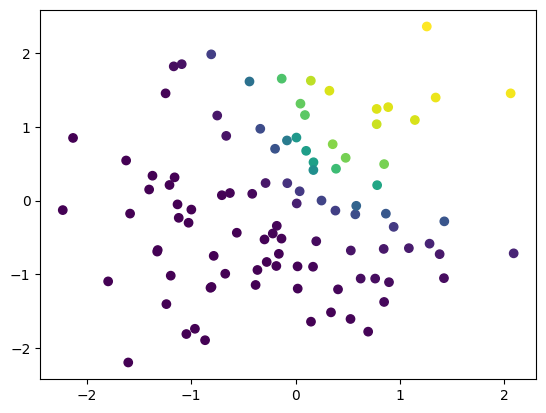

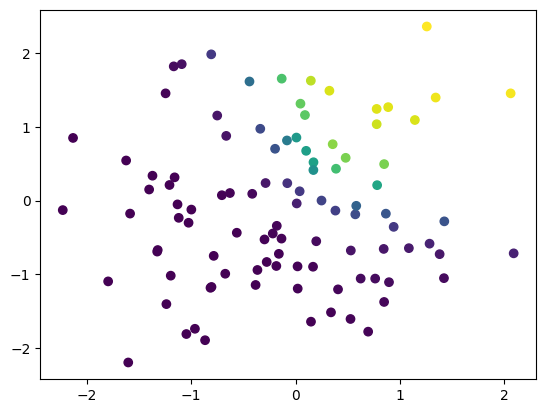

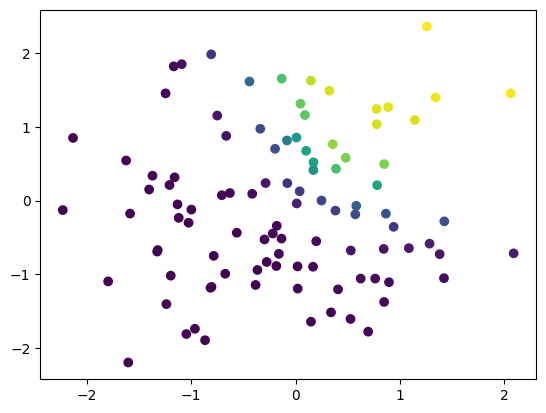

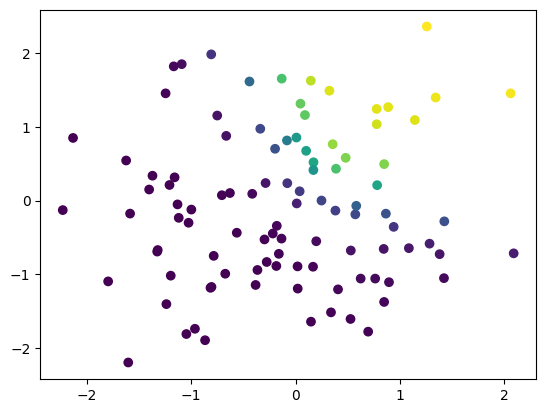

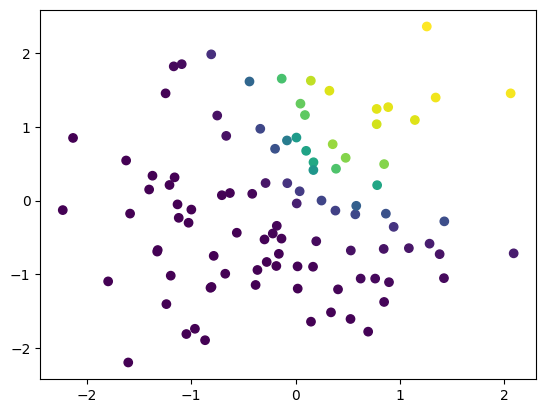

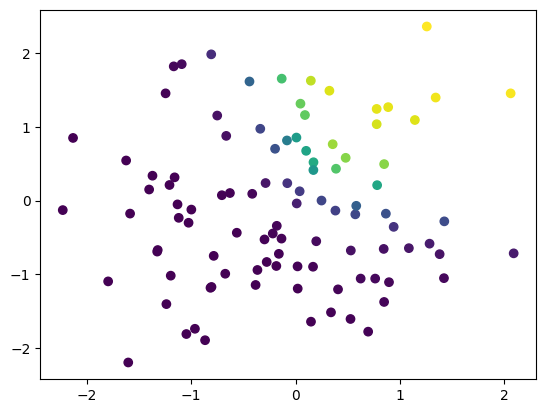

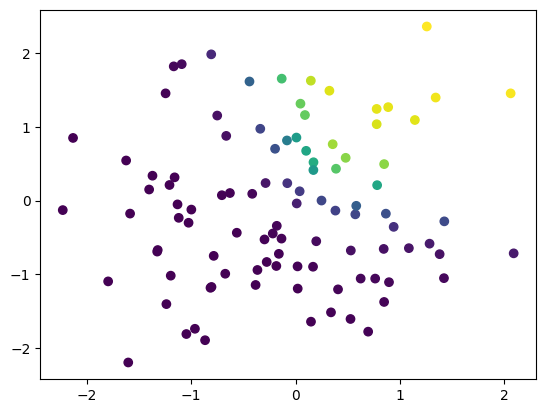

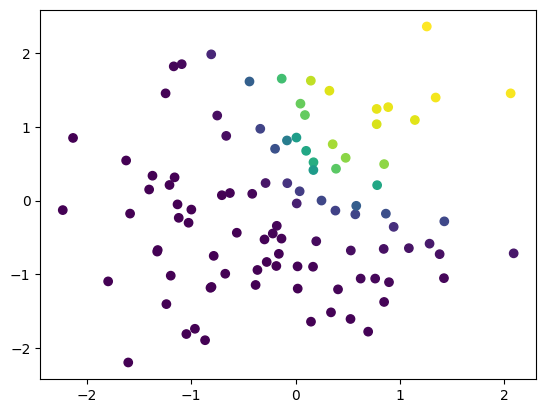

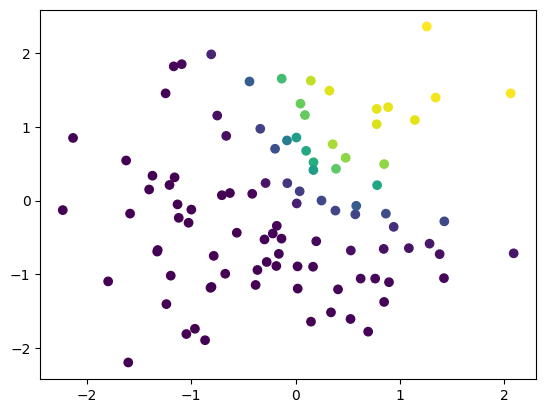

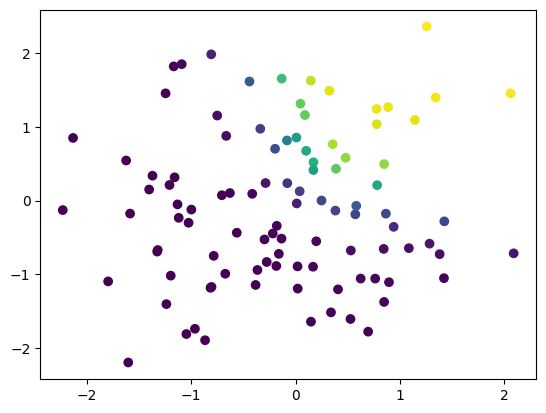

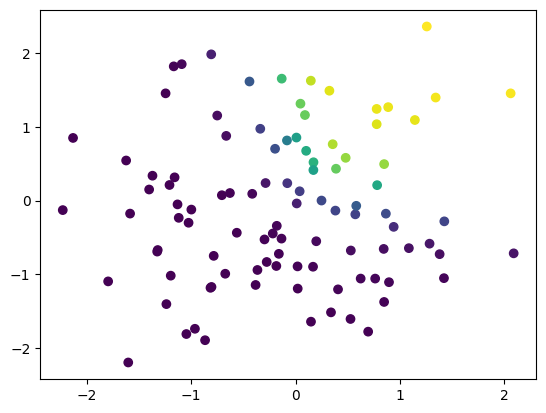

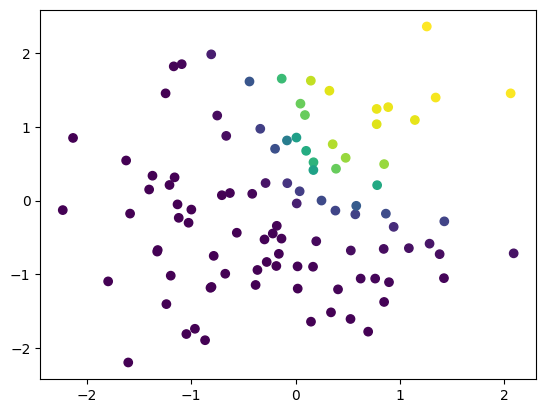

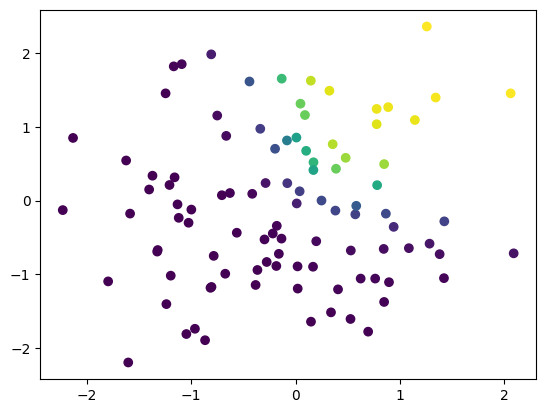

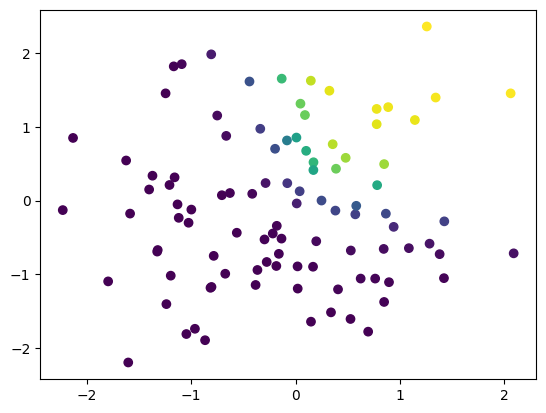

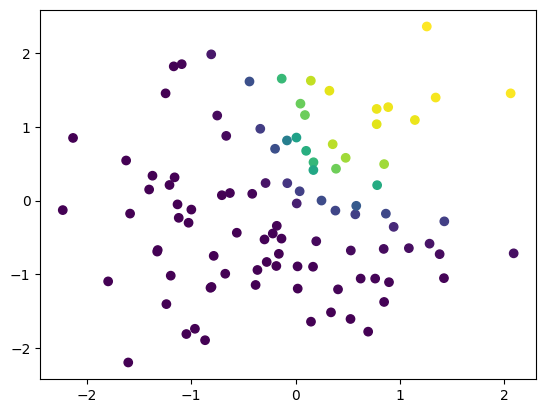

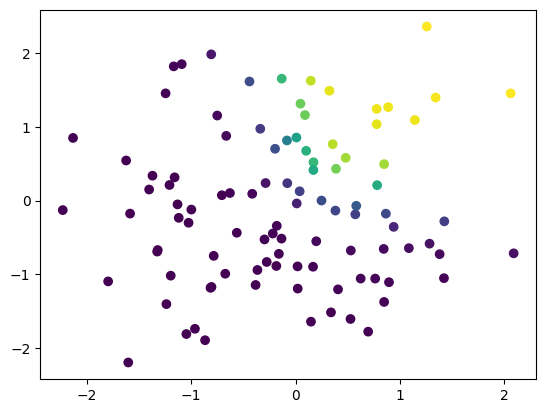

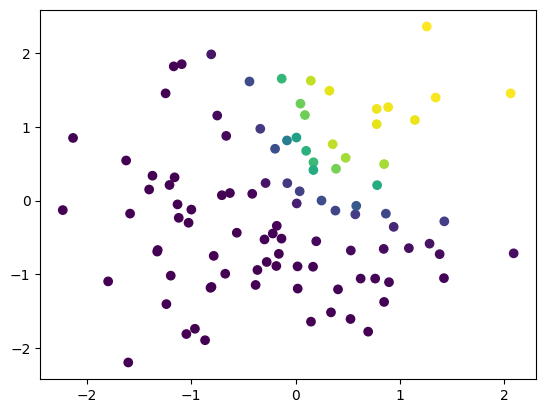

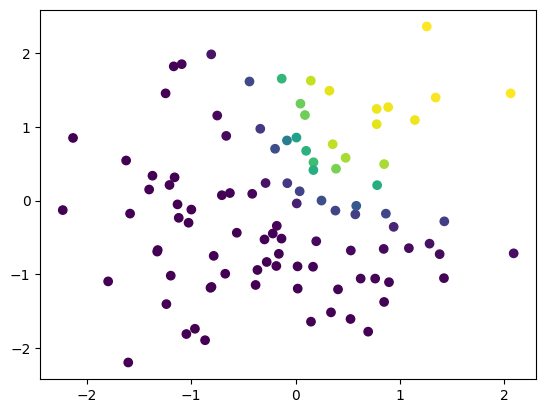

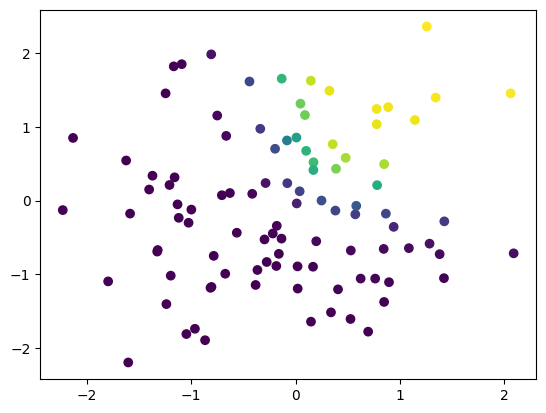

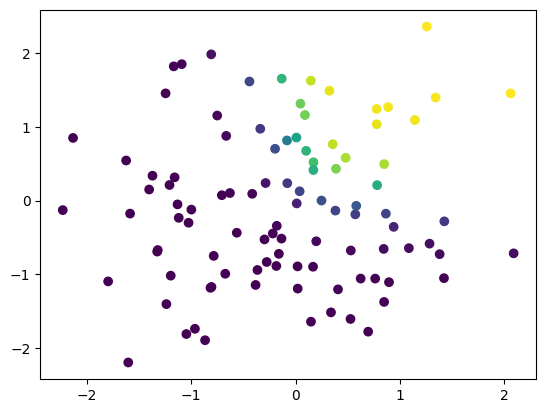

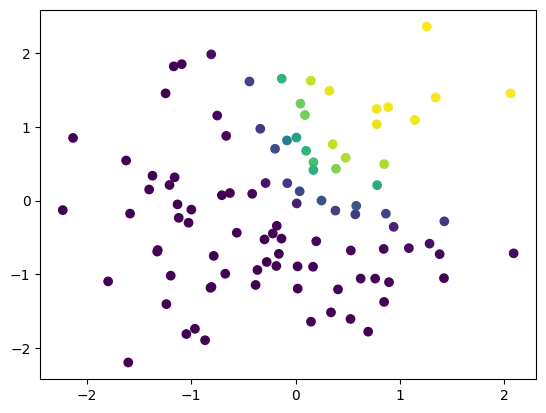

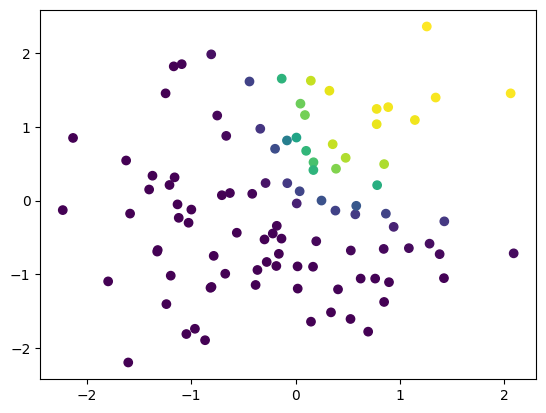

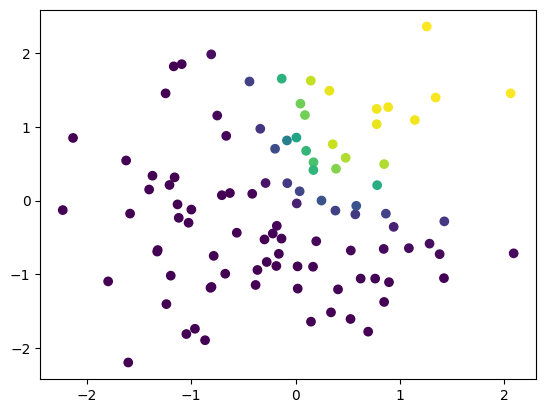

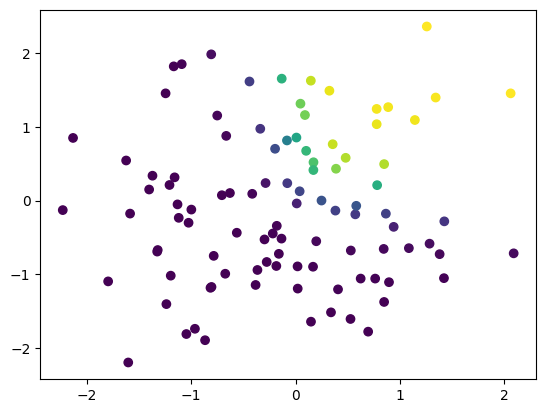

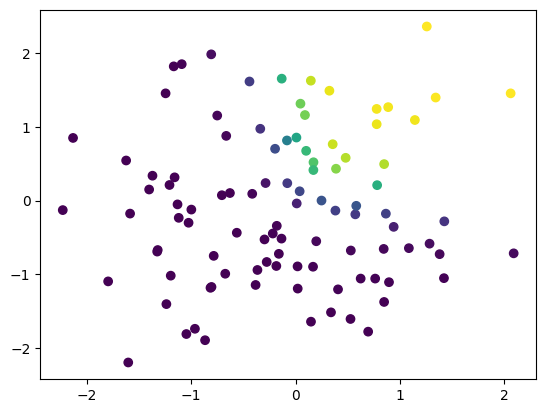

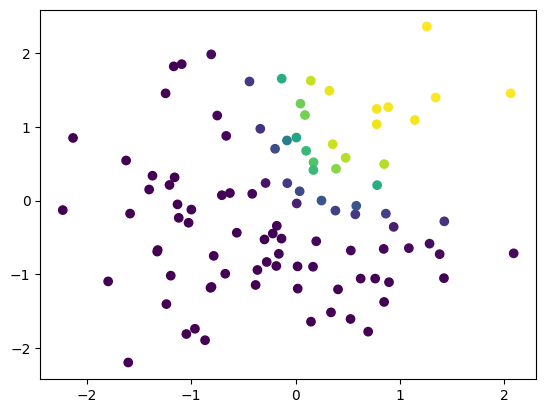

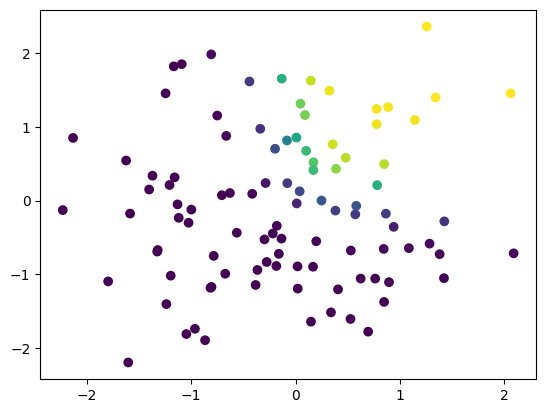

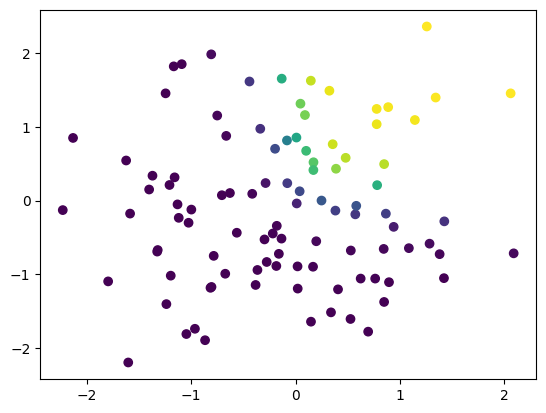

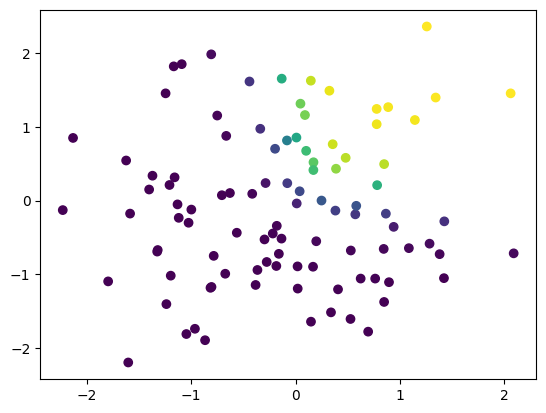

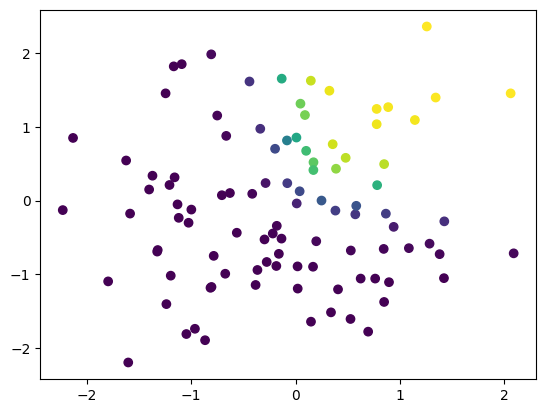

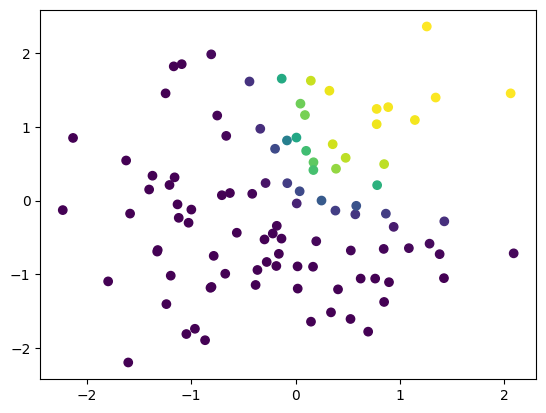

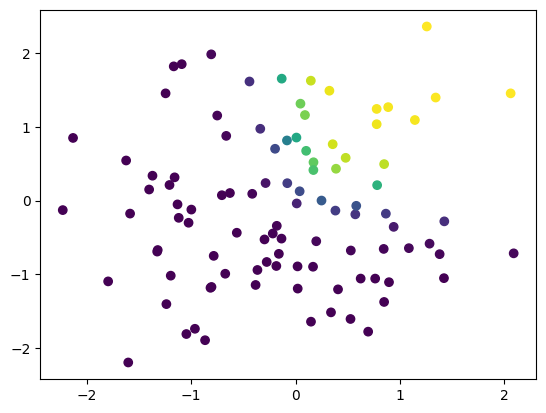

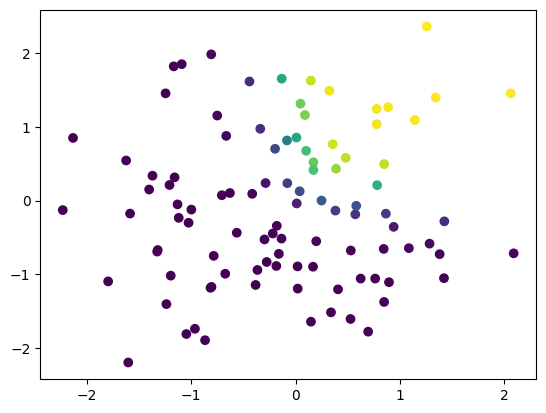

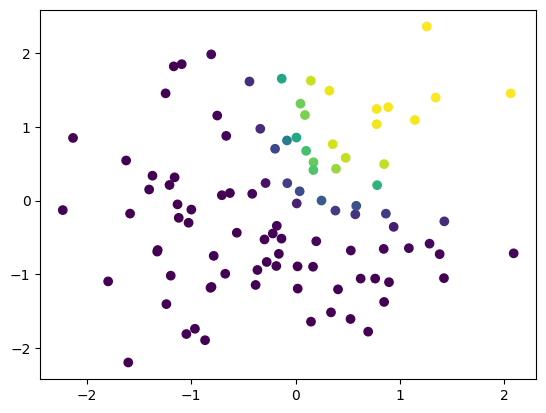

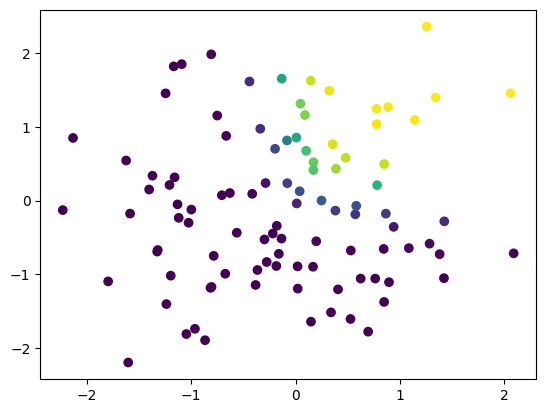

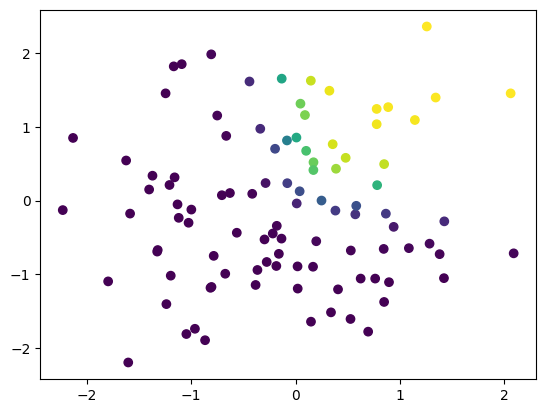

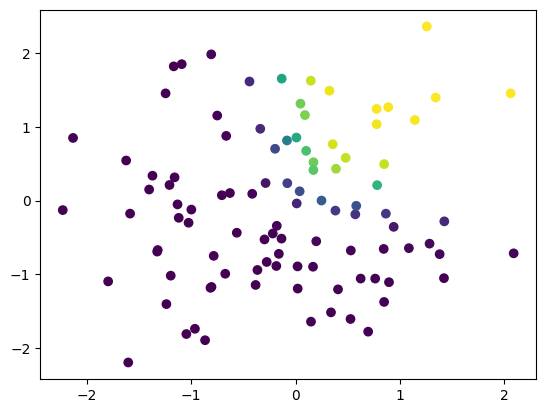

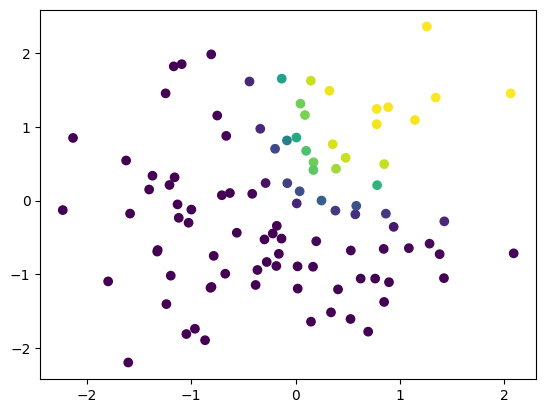

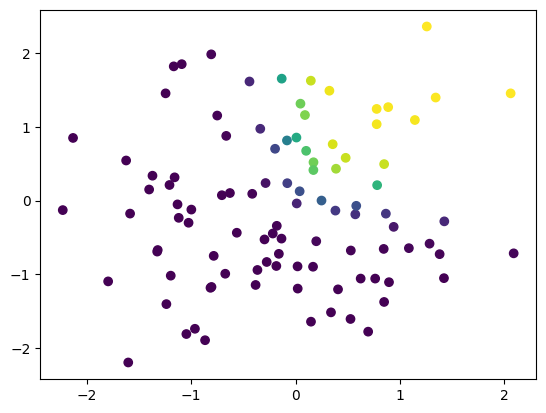

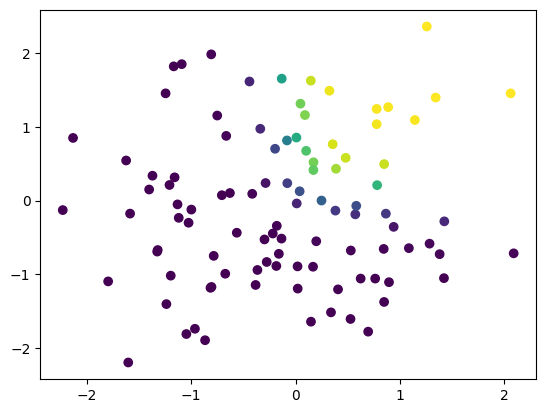

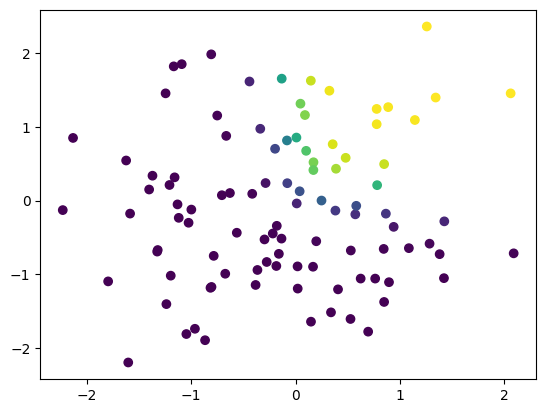

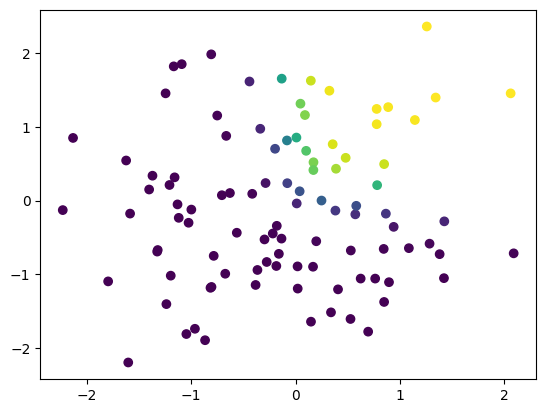

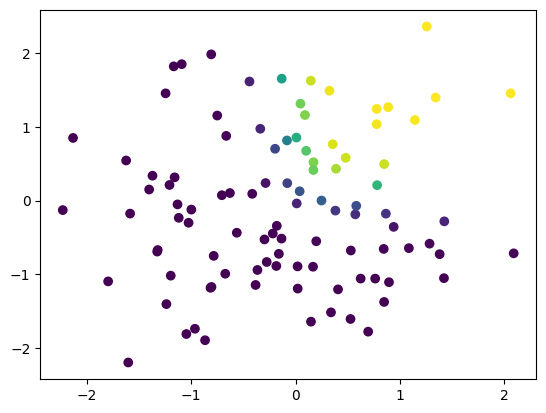

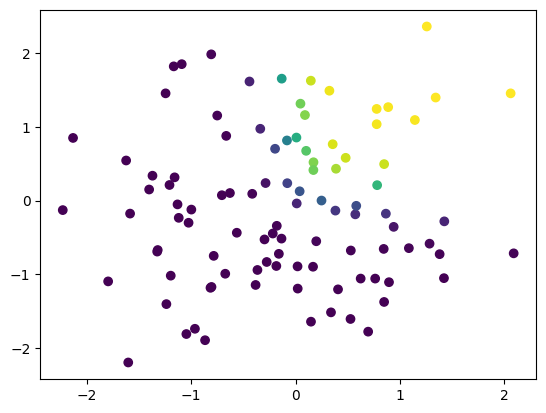

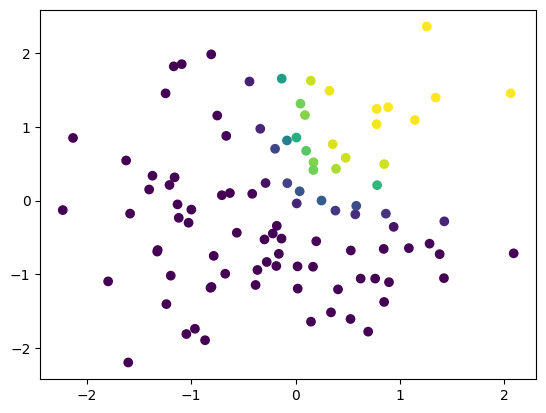

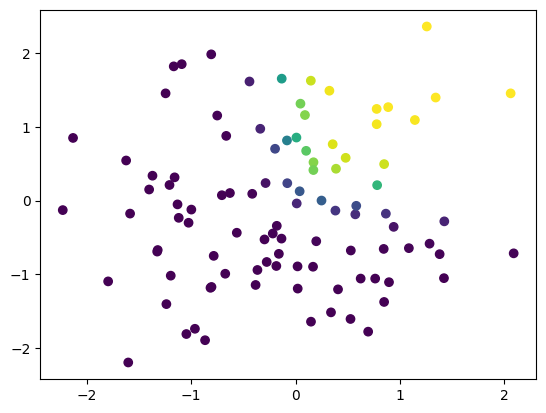

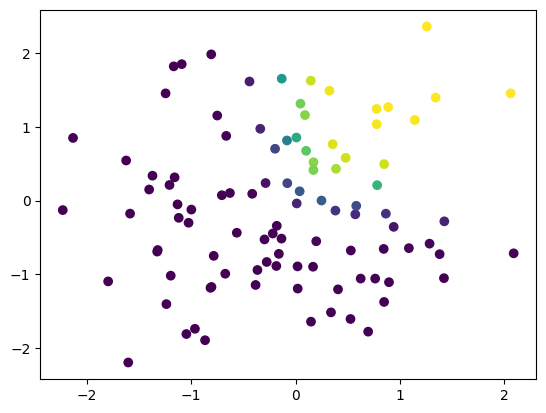

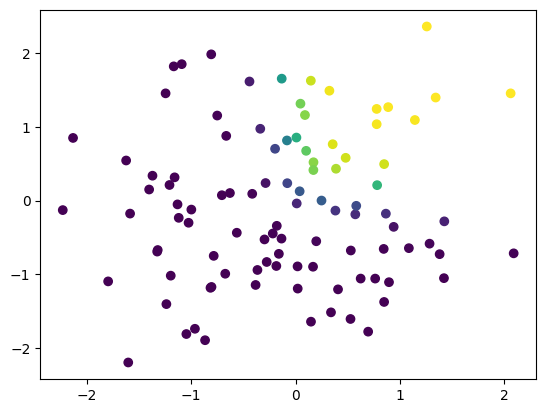

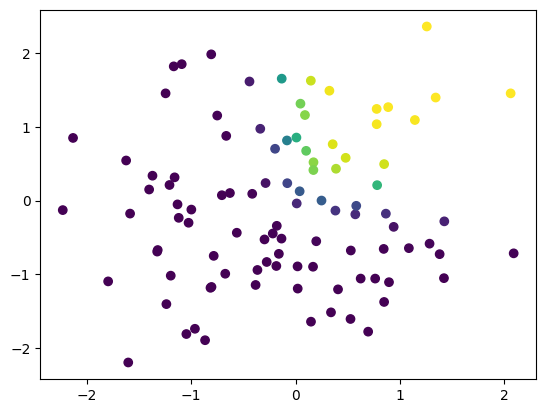

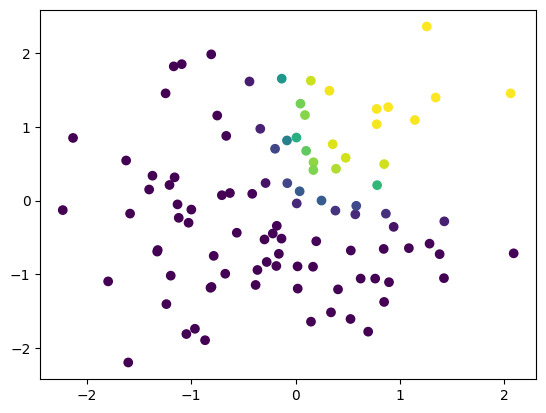

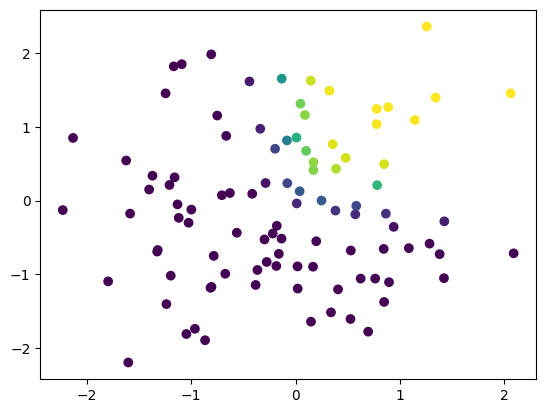

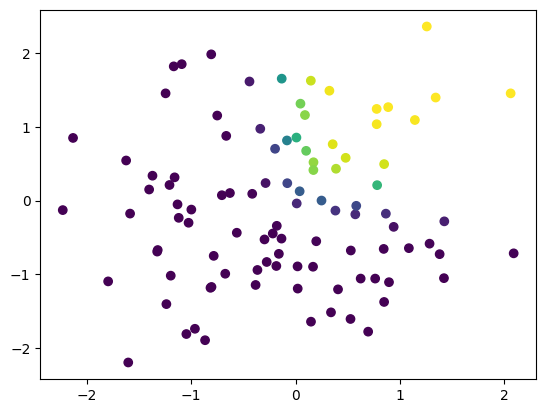

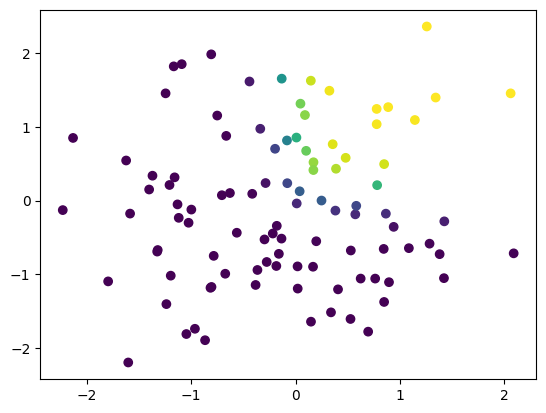

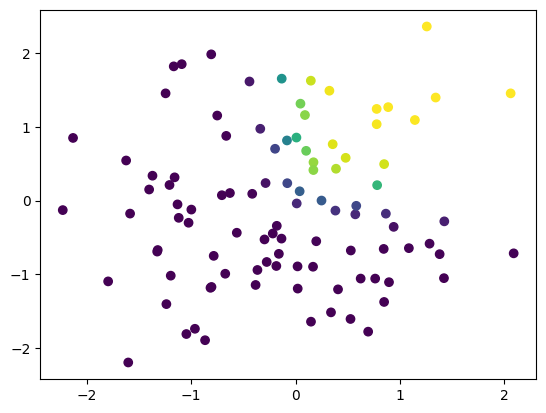

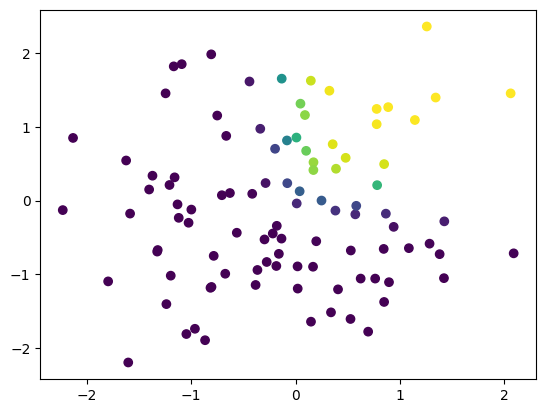

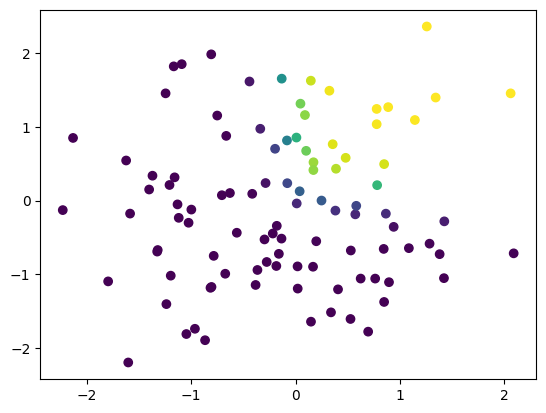

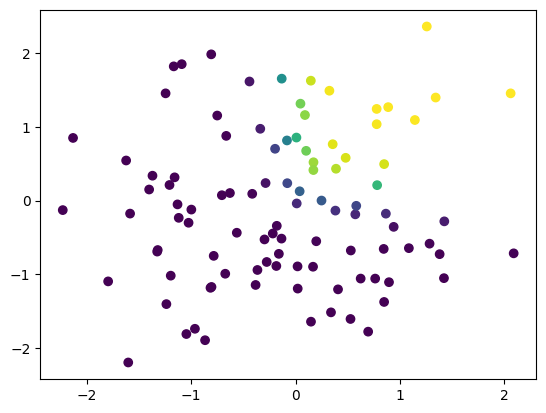

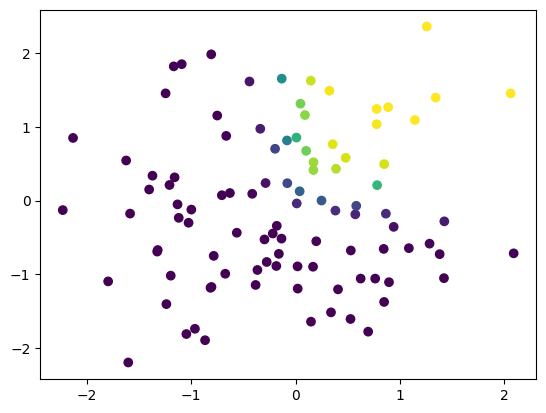

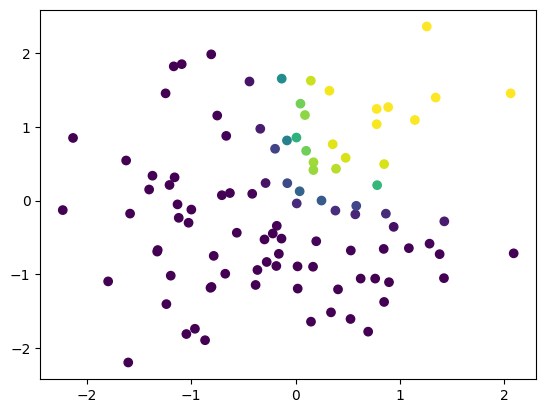

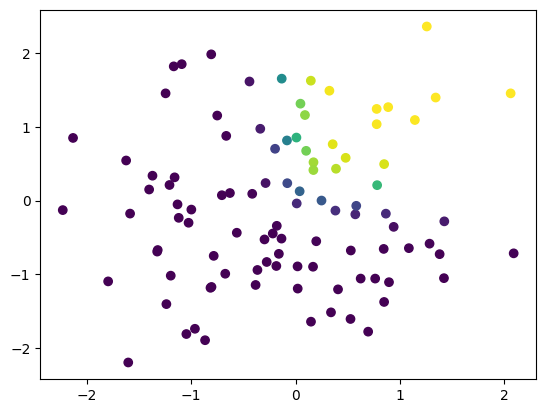

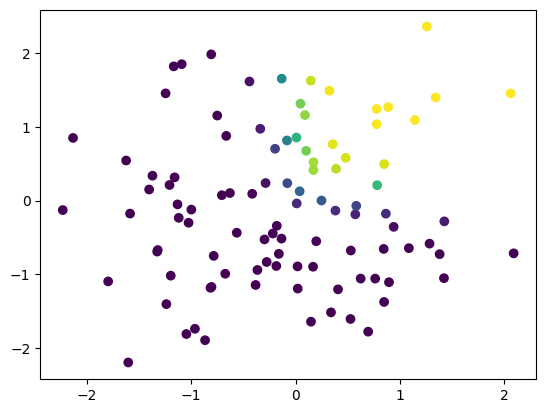

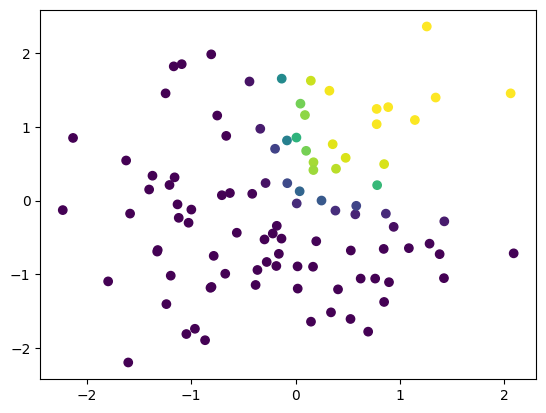

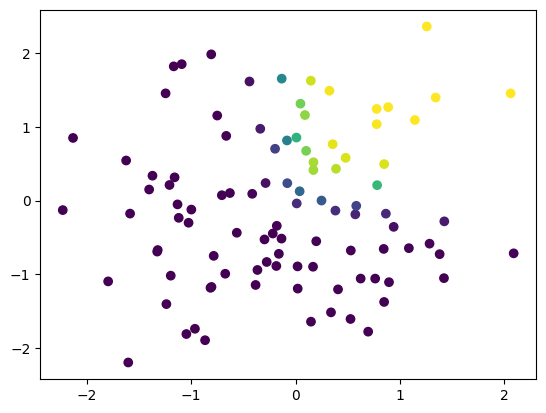

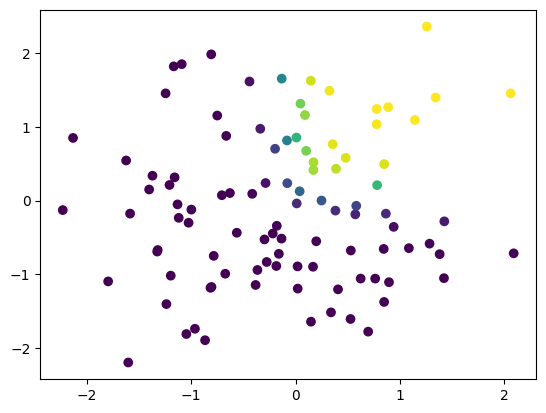

Finished Training


In [6]:
for epoch in range(1000) :
    # 순전파 단계
    y_pred = model(x)

    # 손실 계산
    loss = criterion(y_pred.squeeze(), y)

    # 역전파 단계 
    optimizer.zero_grad() # 옵티마이저의 모든 가중치에 대한 변화 0으로 초기화 -> 이전 기울기값이 남아있을 가능성이 있어서
    loss.backward() # 손실함수 역전파 수행
    optimizer.step() # 

    # 중간 결과를 시각화
    if epoch % 10 == 0 :
        plt.clf()
        plt.scatter(x[:, 0], x[:, 1], c=y_pred.detach().numpy().squeeze())
        plt.show()
print("Finished Training")
        